# Trading bot for cryptocurrency market 
### Predict cryptocurrency prices using machine learning and deep learning models

**Project Description**

In recent years, the race for investing into the cryptocurrency market has been an appealing areas for all of the people around the world. Although the cryptocurrency market is full of risk when not carefully approaching, with proper tools and knowledge, traders in this market will stand out and can have a significant profit from this type of market. 2024 comes with a era of machine learning and deep learning, which can be access not only by big companies, but with individual computers nowadays can join in the development of this arena. And using machine learning as a tool to guide traders on having the best decision has been always an area for more advanced developments in the future.

**Executive Summary**

I started this project by just focusing on getting a good understanding of the dataset. The EDA is detailed and many visualizations are included.

# Loading libraries

In [2]:
import pandas as pd
import numpy as np
import datetime
import time
import ccxt
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os

# Load dataset
In this data analysis, we will choose the Bitcoin cryptocurrency to analyze. We conduct data from 2019 to 2024.

In [3]:
if os.path.exists('BTC_USDT_1h_data.csv'):
    print("BTC/USDT data is already in the folder. Loading the data...")
    df = pd.read_csv('BTC_USDT_1h_data.csv')
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    print("Data loaded.")
else:
    print("BTC/USDT data is not in the folder. Downloading the data...")
    exchange = ccxt.binance()

    symbol = 'BTC/USDT'
    timeframe = '1h'

    limit = 1000 # Maximum limit per request
    since = exchange.parse8601('2019-01-01T00:00:00Z')
    all_candles = []

    while since < exchange.milliseconds():
        try:
            # Fetch OHLCV data
            candles = exchange.fetch_ohlcv(symbol, timeframe, since, limit)
            if not candles:
                break

            all_candles += candles

            # Update 'since' to the timestamp of the last fetched candles
            since = candles[-1][0] + 1

            # Sleep to avoid hitting the rate limit
            time.sleep(exchange.rateLimit / 1000)

        except Exception as e:
            print(f"Error: {e}")
            break

    df = pd.DataFrame(all_candles, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

    # Convert for readable
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')

    # Save to CSV
    df.to_csv('BTC_USDT_1h_data.csv', index=False)
    print("Finishing download and loaded BTC data.")

BTC/USDT data is already in the folder. Loading the data...
Data loaded.


# EDA: Exploratory data analysis
In this step, we start exploring the data following the EDA framework:
1. **Discovering**: Ask questions and familarize with the data so we can start conceptualizing how to use it.
2. **Structering**: Take raw data and organize and transform, categorize it to be more easily visualized, explained or modeled.
3. **Cleaning**: Remove errors that may distort data or make it less useful
4. **Joining**: Augment or adjust data by adding values from other datasets.
5. **Validating**: Verify that the data is consistent and high quality
6. **Presenting**: Make cleaned dataset or data visualization available to otheres for analysis or further modeling.

#### Let's get started diving into the data!


# Discovering:
We will discover characteristics of a dataset, and use visualizations to analyze the data. We will start off with the **train** dataset.

### Display the first 10 rows of the data
Display the first 10 rows of the data to get an understanding of how the dataset is structured.

In [4]:
df.head(10)

,Timestamp,Open,High,Low,Close,Volume
0,2019-01-01 00:00:00,3701.23,3713.00,3689.88,3700.31,686.367420
1,2019-01-01 01:00:00,3700.20,3702.73,3684.22,3689.69,613.539115
2,2019-01-01 02:00:00,3689.67,3695.95,3675.04,3690.00,895.302181
3,2019-01-01 03:00:00,3690.00,3699.77,3685.78,3693.13,796.714818
4,2019-01-01 04:00:00,3692.32,3720.00,3685.94,3692.71,1317.452909
5,2019-01-01 05:00:00,3693.98,3704.44,3692.73,3699.94,572.402228
6,2019-01-01 06:00:00,3699.95,3713.93,3697.00,3703.56,660.279771
7,2019-01-01 07:00:00,3703.63,3726.64,3703.34,3713.83,823.625491
8,2019-01-01 08:00:00,3714.19,3731.19,3707.00,3716.70,887.101362
9,2019-01-01 09:00:00,3716.98,3732.00,3696.14,3699.95,955.879034


### Assess the shape and size of the dataset
Get a sense of how large the dataset is, and how it's shaped

In [5]:
print(f'The dataset size is : {df.size}')
print(f'The dataset shape is : {df.shape}')

The dataset size is : 300978
The dataset shape is : (50163, 6)


### Get basic information about the dataset
To further understand what the dataset entails, get basic information about the dataset, including the data type of values in each column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50163 entries, 0 to 50162
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  50163 non-null  datetime64[ns]
 1   Open       50163 non-null  float64       
 2   High       50163 non-null  float64       
 3   Low        50163 non-null  float64       
 4   Close      50163 non-null  float64       
 5   Volume     50163 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.3 MB


### Find descriptive statistics
Find descriptive statistics and structure dataset

In [7]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume
count,50163,50163.000000,50163.000000,50163.000000,50163.000000,50163.000000
mean,2021-11-12 23:43:33.073381120,29071.830473,29205.446807,28930.507070,29073.014463,3315.347416
min,2019-01-01 00:00:00,3366.630000,3386.970000,3349.920000,3366.410000,0.000000
25%,2020-06-08 01:30:00,10306.265000,10347.905000,10266.835000,10306.415000,1048.734315
50%,2021-11-13 12:00:00,26492.920000,26559.680000,26429.260000,26493.390000,1839.241776
75%,2023-04-20 01:30:00,43170.010000,43368.510000,43002.575000,43170.125000,3616.349109
max,2024-09-23 14:00:00,73577.350000,73777.000000,73215.140000,73577.350000,137207.188600
std,NaN,19326.915832,19414.931670,19233.348513,19327.190426,4503.298436


# Plot the data trends over time

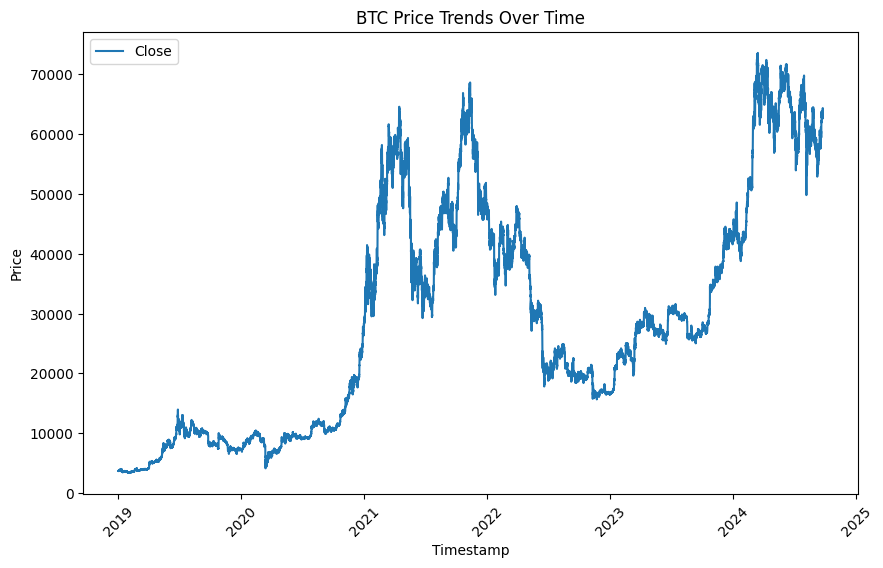

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Close'], label='Close')
plt.title("BTC Price Trends Over Time")
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

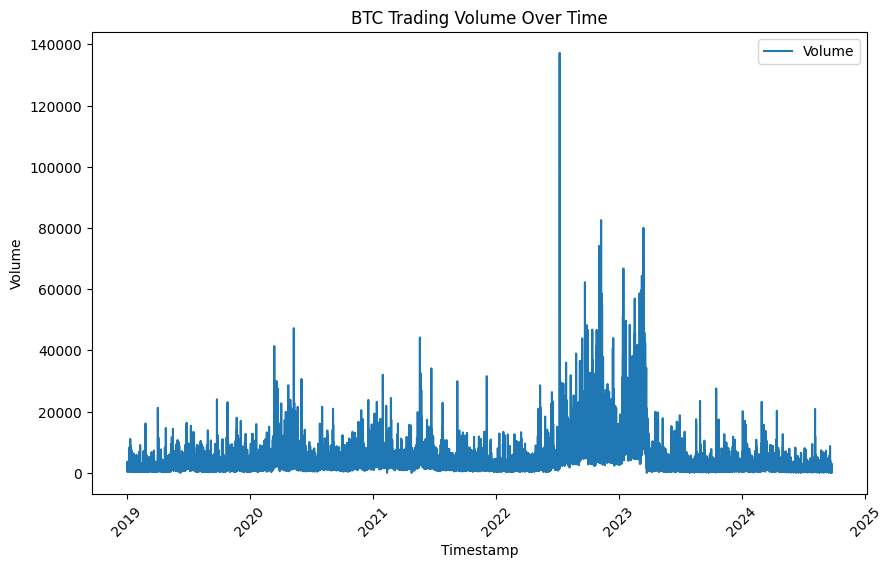

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Volume'], label='Volume')
plt.title("BTC Trading Volume Over Time")
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Correlation matrix plotting

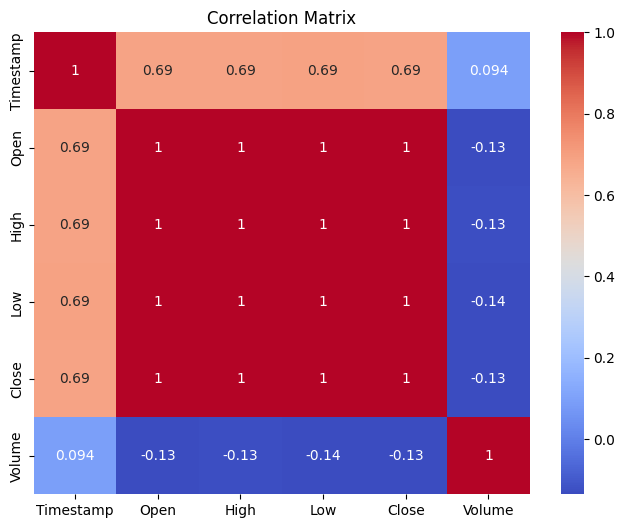

In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Cleaning
This step, we will check the availability of data, and scout for any outliers, error in data.

### Check for missing data
Checking if there is any missing data

In [11]:
print(df.isnull().sum())

Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64


### Plot box
Use plot box to detect any outliers in the dataset

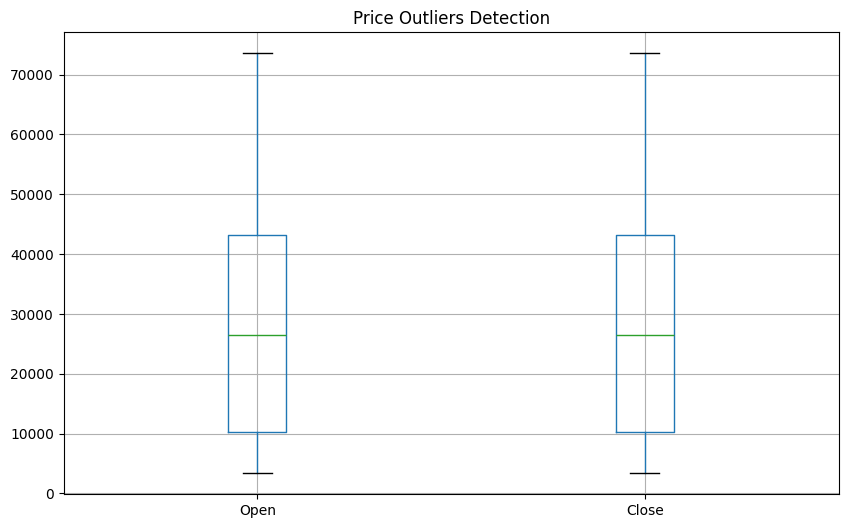

In [12]:
df[['Open', 'Close', 'Volume']].boxplot(figsize=(10,6))
plt.title("Price Outliers Detection")
plt.show()

# Structuring
We add new features based on the raw data to get more insights 

### Discover data over year:

We want to check the data in context of year.

In [13]:
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df.head(10)

,Timestamp,Open,High,Low,Close,Volume,Year,Month
0,2019-01-01 00:00:00,3701.23,3713.00,3689.88,3700.31,686.367420,2019,1
1,2019-01-01 01:00:00,3700.20,3702.73,3684.22,3689.69,613.539115,2019,1
2,2019-01-01 02:00:00,3689.67,3695.95,3675.04,3690.00,895.302181,2019,1
3,2019-01-01 03:00:00,3690.00,3699.77,3685.78,3693.13,796.714818,2019,1
4,2019-01-01 04:00:00,3692.32,3720.00,3685.94,3692.71,1317.452909,2019,1
5,2019-01-01 05:00:00,3693.98,3704.44,3692.73,3699.94,572.402228,2019,1
6,2019-01-01 06:00:00,3699.95,3713.93,3697.00,3703.56,660.279771,2019,1
7,2019-01-01 07:00:00,3703.63,3726.64,3703.34,3713.83,823.625491,2019,1
8,2019-01-01 08:00:00,3714.19,3731.19,3707.00,3716.70,887.101362,2019,1
9,2019-01-01 09:00:00,3716.98,3732.00,3696.14,3699.95,955.879034,2019,1


In [14]:
yearly_avg = df.groupby(['Year'])['Close'].mean()
yearly_avg.head()

Year
2019     7353.453012
2020    11066.935128
2021    47359.295131
2022    28224.538651
2023    28805.284479
Name: Close, dtype: float64

### Average price over year

/tmp/ipykernel_4759/2289301625.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


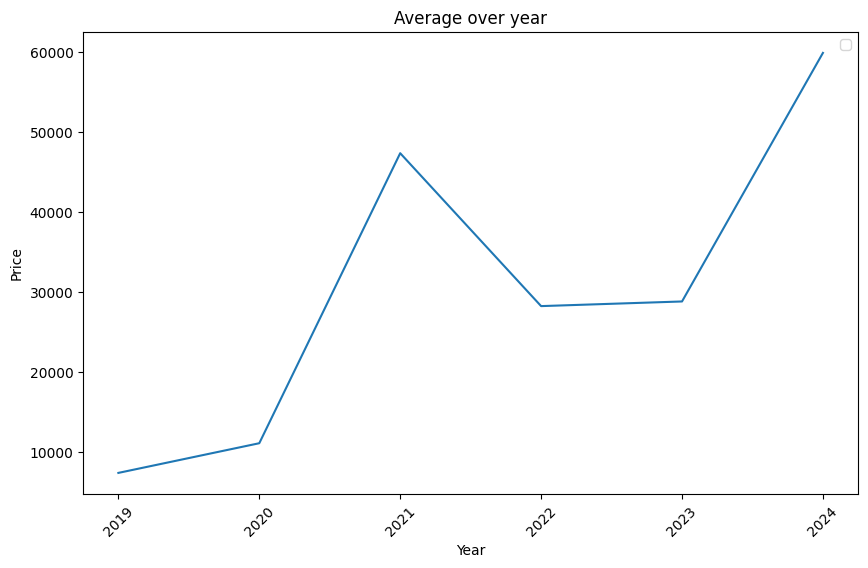

In [15]:
# Group by Year and Month and calculate the average close price for each month
yearly_avg = df.groupby(['Year'])['Close'].mean()
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg)
plt.title("Average over year")
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Average close price over month in each year

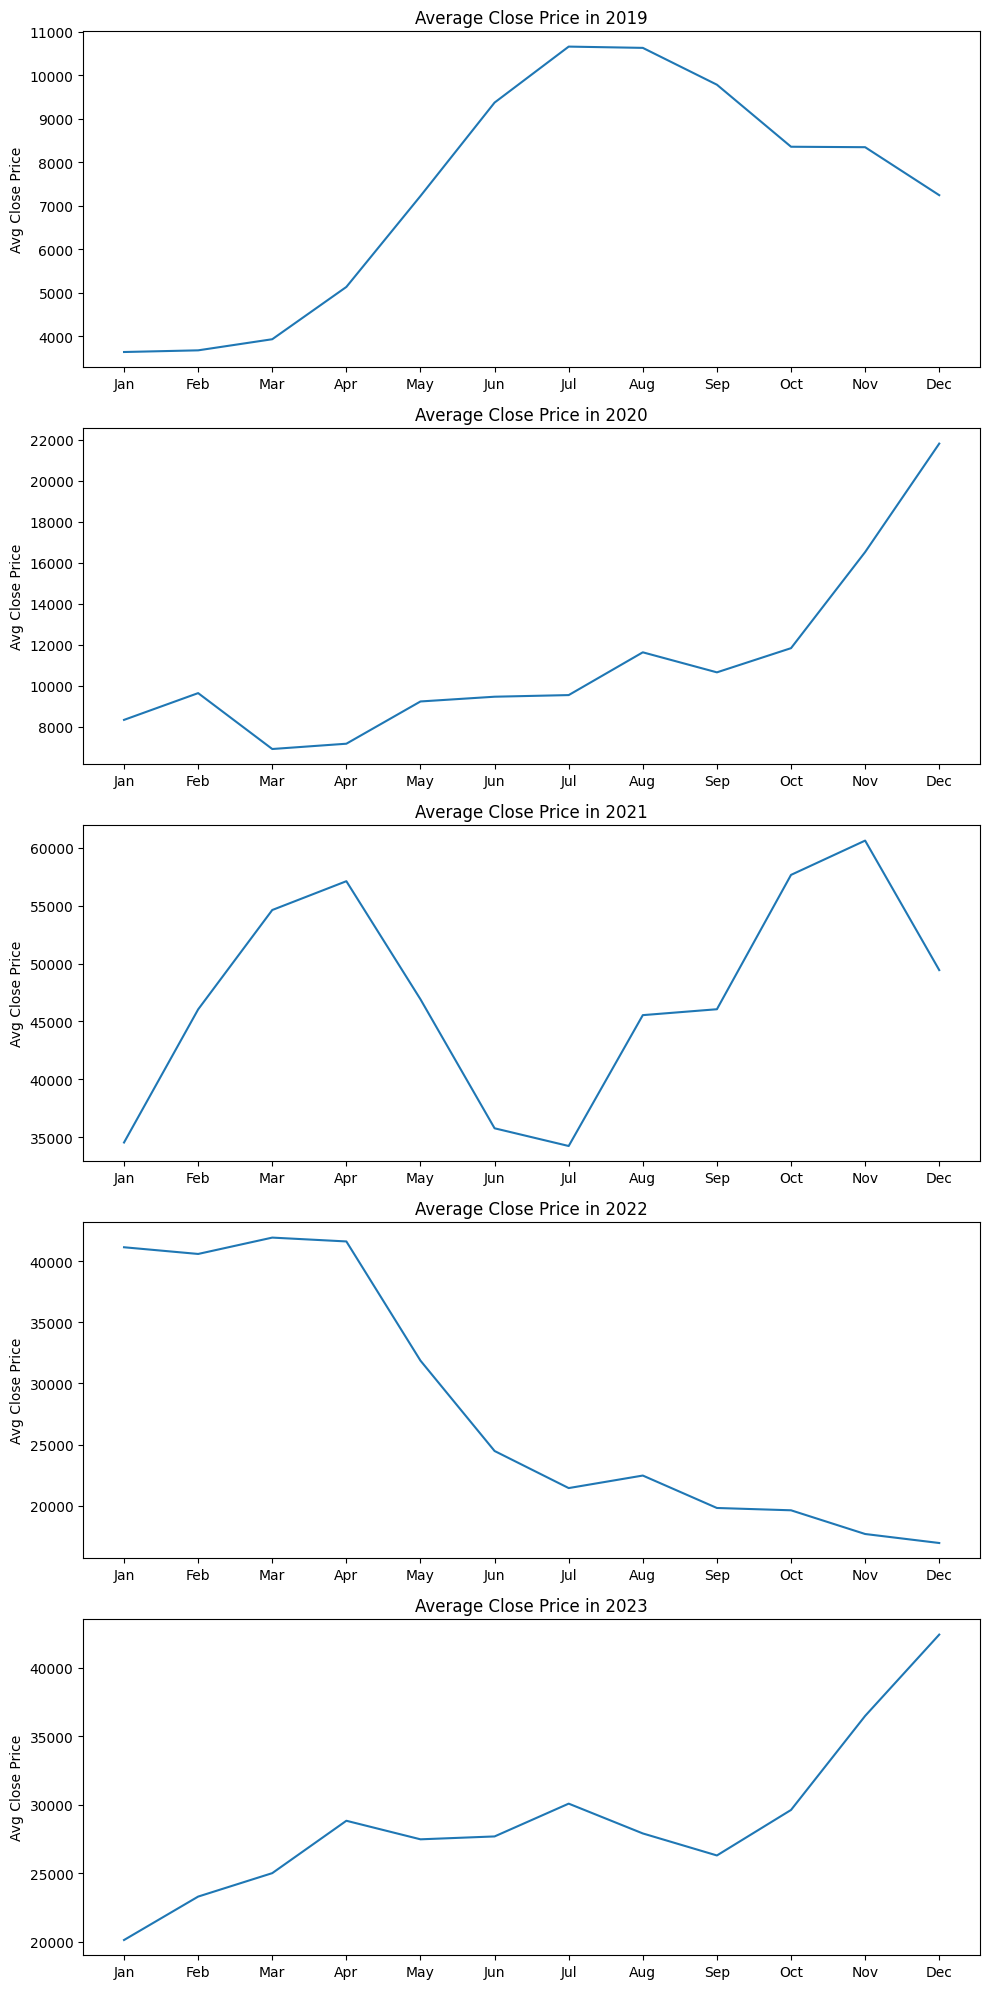

In [16]:
# Group by Year and Month and calculate the average close price for each month
monthly_avg = df.groupby(['Year', 'Month'])['Close'].mean().unstack(level=0)
# Plotting
fig, axes = plt.subplots(5, 1, figsize=(10, 20))
# List of moth names for labeling the x-axis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Loop through each year (2019-2024)
for i, year in enumerate(range(2019, 2024)):
    axes[i].plot(monthly_avg.index, monthly_avg[year])
    axes[i].set_title(f"Average Close Price in {year}")
    axes[i].set_ylabel("Avg Close Price")
    axes[i].set_xticks(monthly_avg.index) # Why index here
    axes[i].set_xticklabels(month_names)

plt.tight_layout()
plt.show()

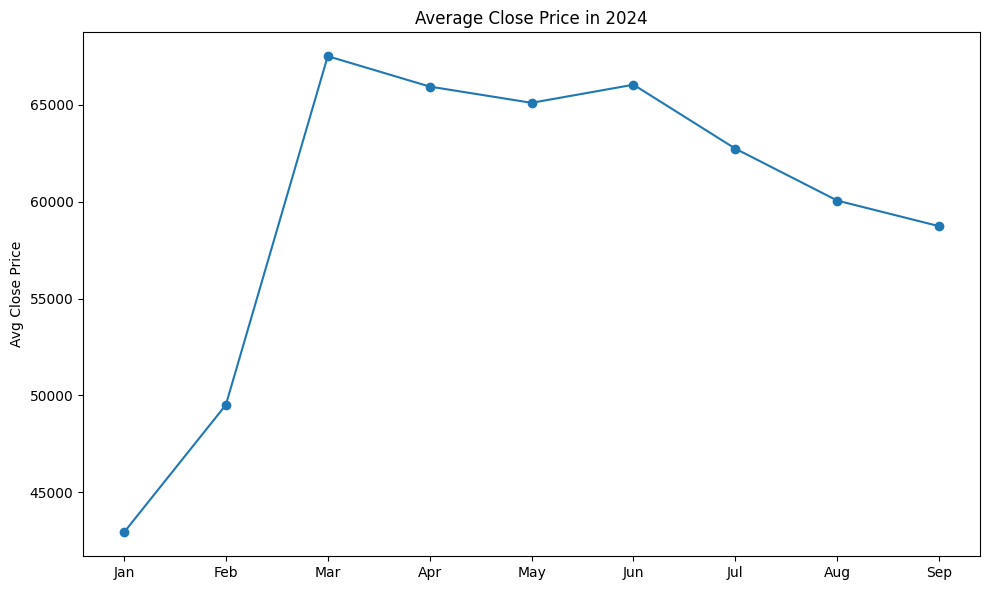

In [17]:
# Group by Year and Month and calculate the average close price for each month
monthly_avg = df.groupby(['Year', 'Month'])['Close'].mean().unstack(level=0)

# Filter only for 2024
monthly_avg_2024 = monthly_avg[2024].dropna()  # Drop months with no data (NaN)

# Plotting for 2024
fig, ax = plt.subplots(figsize=(10, 6))

# List of month names for labeling the x-axis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the available data for 2024
ax.plot(monthly_avg_2024.index, monthly_avg_2024, marker='o')

# Set title and labels
ax.set_title('Average Close Price in 2024')
ax.set_ylabel('Avg Close Price')
ax.set_xticks(monthly_avg_2024.index)  # Set x-ticks to the available months
ax.set_xticklabels([month_names[m - 1] for m in monthly_avg_2024.index])  # Display correct month names under x-axis

plt.tight_layout()
plt.show()

### Add technical indicator for insights
We check the technical indicator added to the dataset to gain more insights.

In [18]:
# Calculate Simple Moving Average (SMA)
df['SMA_20'] = df['Close'].rolling(window=20).mean()  # 20-period SMA
df['SMA_50'] = df['Close'].rolling(window=50).mean()  # 50-period SMA
df['SMA_200'] = df['Close'].rolling(window=200).mean()  # 200-period SMA

# Calculate Exponential Moving Average (EMA)
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()  # 20-period EMA
df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()  # 50-period EMA
df['EMA_200'] = df['Close'].ewm(span=200, adjust=False).mean()  # 200-period EMA

# Calculate Relative Strength Index (RSI)
window_length = 14
close = df['Close']

# Calculate price changes
delta = close.diff()

# Calculate the gains and losses
gain = (delta.where(delta > 0, 0))
loss = (-delta.where(delta < 0, 0))

# Calculate the average gain and loss
avg_gain = gain.rolling(window=window_length).mean()
avg_loss = loss.rolling(window=window_length).mean()

# Calculate the RSI
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Calculate Bollinger Bands
df['Upper_BB'] = df['SMA_20'] + (df['Close'].rolling(window=20).std() * 2)  # Upper band
df['Lower_BB'] = df['SMA_20'] - (df['Close'].rolling(window=20).std() * 2)  # Lower band

# Display the head of the DataFrame to verify the indicators
print(df[['Close', 'SMA_20', 'SMA_50', 'SMA_200', "EMA_20", 'EMA_50', 'EMA_200', 'RSI', 'Upper_BB', 'Lower_BB']].head())


     Close  SMA_20  SMA_50  SMA_200       EMA_20       EMA_50      EMA_200  \
0  3700.31     NaN     NaN      NaN  3700.310000  3700.310000  3700.310000   
1  3689.69     NaN     NaN      NaN  3699.298571  3699.893529  3700.204328   
2  3690.00     NaN     NaN      NaN  3698.412993  3699.505548  3700.102793   
3  3693.13     NaN     NaN      NaN  3697.909851  3699.255526  3700.033412   
4  3692.71     NaN     NaN      NaN  3697.414627  3698.998839  3699.960542   

   RSI  Upper_BB  Lower_BB  
0  NaN       NaN       NaN  
1  NaN       NaN       NaN  
2  NaN       NaN       NaN  
3  NaN       NaN       NaN  
4  NaN       NaN       NaN  


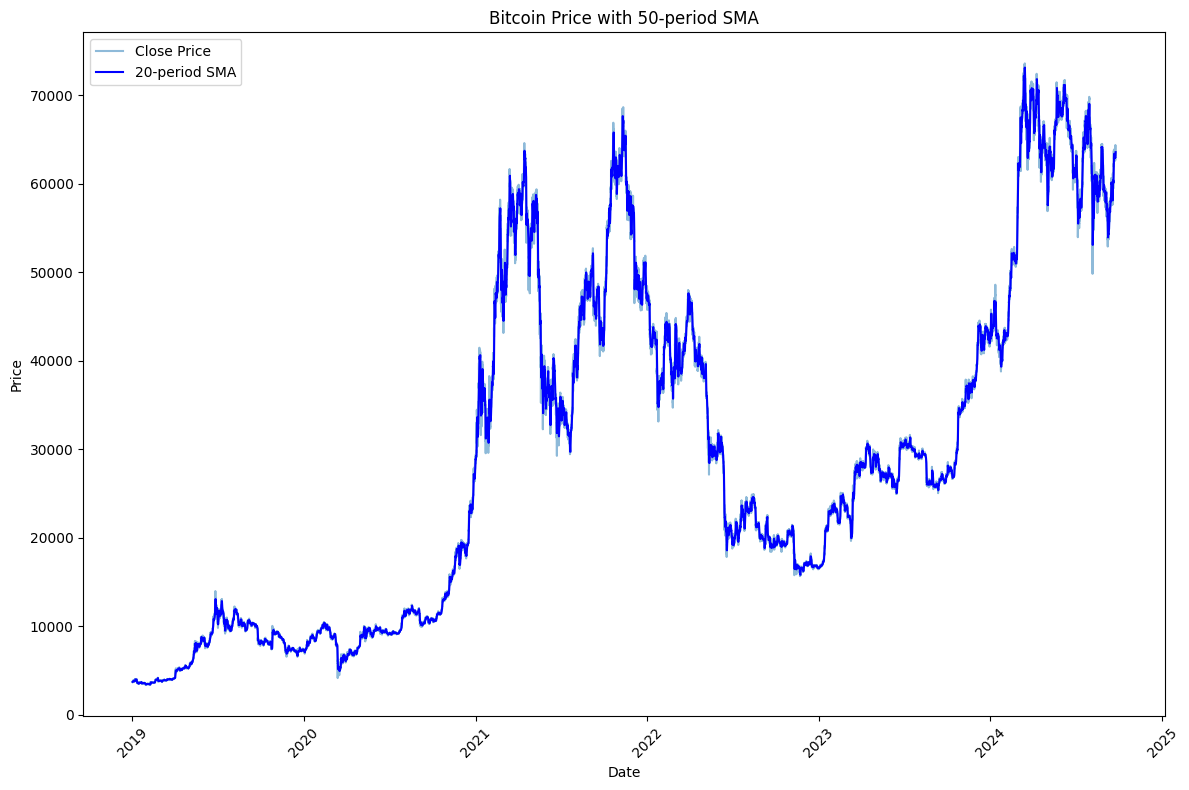

In [19]:
import matplotlib.pyplot as plt

# Plot only Close price with 50-period SMA
plt.figure(figsize=(12, 8))

plt.plot(df['Timestamp'], df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['Timestamp'], df['SMA_20'], label='20-period SMA', color='blue')

# Labels and title
plt.title('Bitcoin Price with 50-period SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

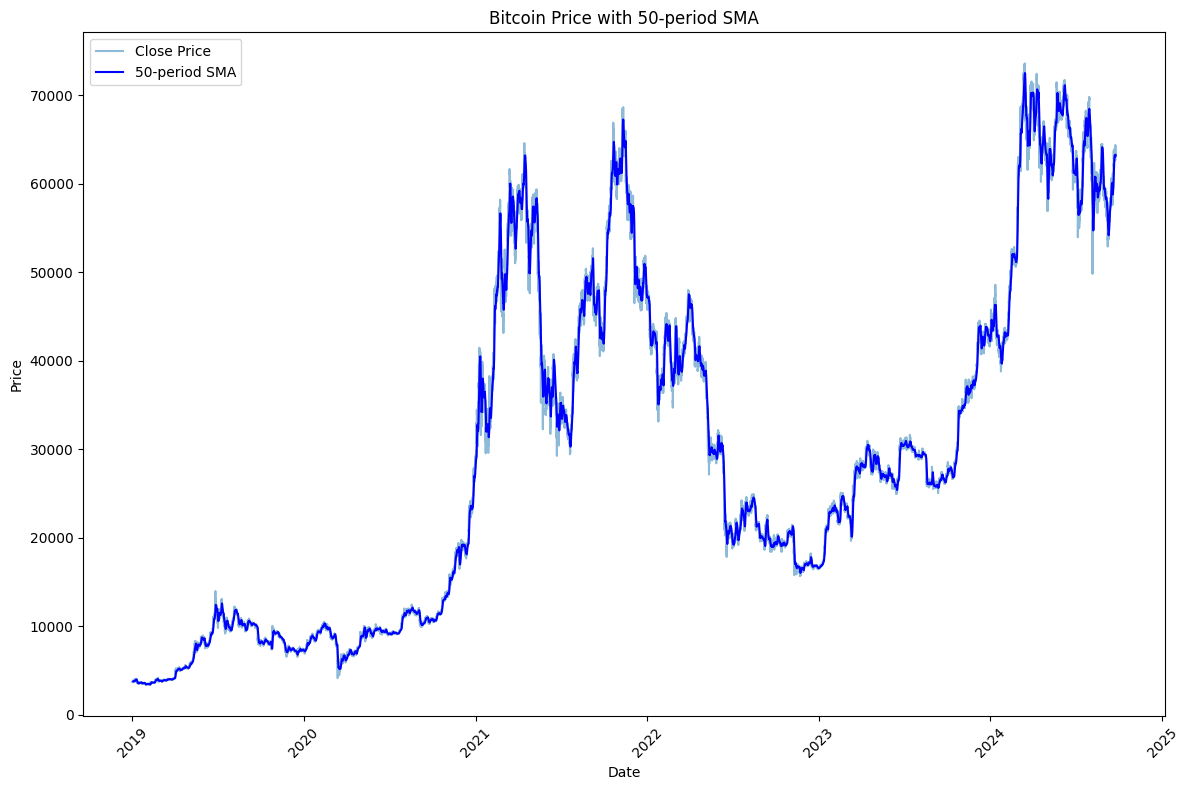

In [20]:
import matplotlib.pyplot as plt

# Plot only Close price with 50-period SMA
plt.figure(figsize=(12, 8))

plt.plot(df['Timestamp'], df['Close'], label='Close Price', alpha=0.5)
plt.plot(df['Timestamp'], df['SMA_50'], label='50-period SMA', color='blue')

# Labels and title
plt.title('Bitcoin Price with 50-period SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


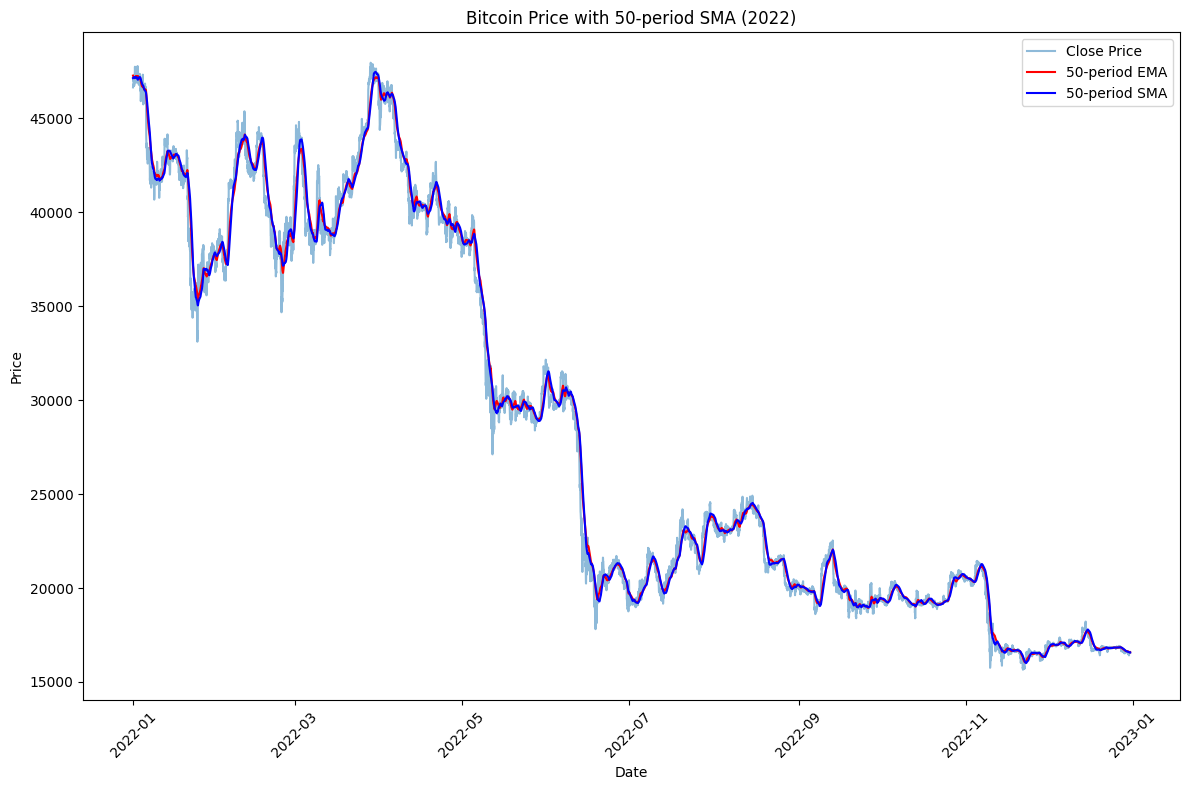

In [21]:
# Filter data to focus on 2022
df_filtered_2022 = df[(df['Timestamp'] >= '2022-01-01') & (df['Timestamp'] <= '2022-12-31')]

# Plotting for the filtered date range
plt.figure(figsize=(12, 8))
plt.plot(df_filtered_2022['Timestamp'], df_filtered_2022['Close'], label='Close Price', alpha=0.5)
plt.plot(df_filtered_2022['Timestamp'], df_filtered_2022['EMA_50'], label='50-period EMA', color='red')
plt.plot(df_filtered_2022['Timestamp'], df_filtered_2022['SMA_50'], label='50-period SMA', color='blue')

plt.title('Bitcoin Price with 50-period SMA (2022)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


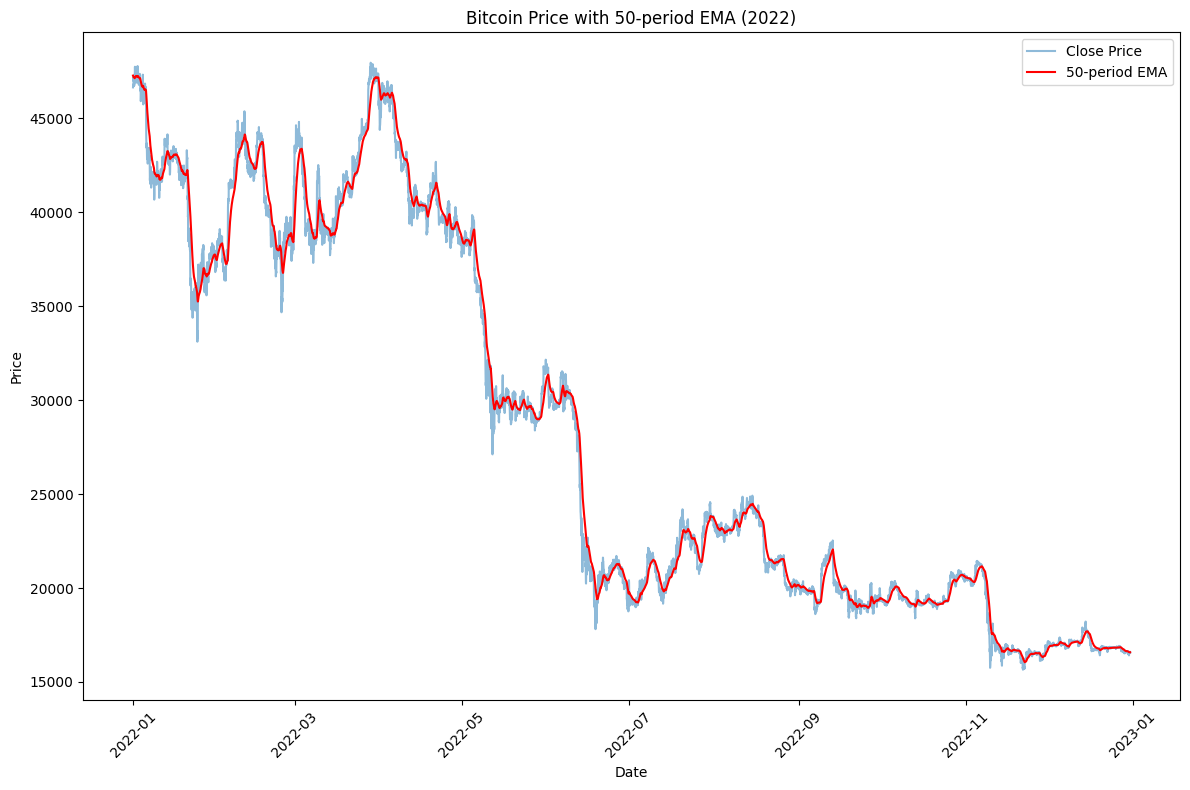

In [22]:
plt.figure(figsize=(12, 8))

plt.plot(df_filtered_2022['Timestamp'], df_filtered_2022['Close'], label='Close Price', alpha=0.5)
plt.plot(df_filtered_2022['Timestamp'], df_filtered_2022['EMA_50'], label='50-period EMA', color='red')

plt.title('Bitcoin Price with 50-period EMA (2022)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


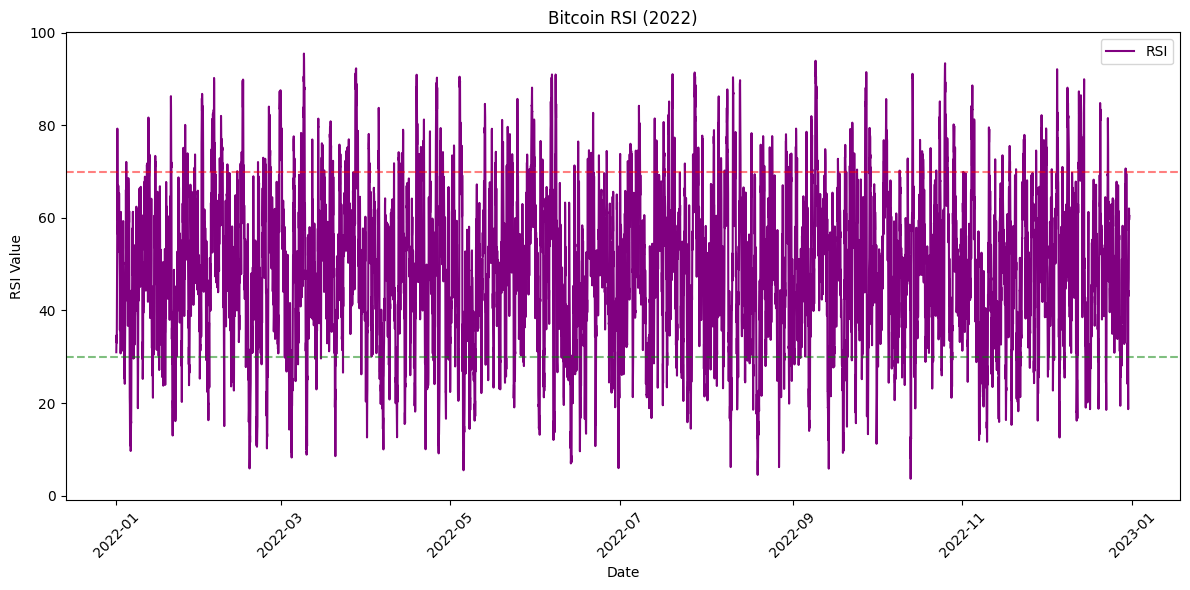

In [23]:
# Plot RSI for 2022
plt.figure(figsize=(12, 6))

plt.plot(df_filtered_2022['Timestamp'], df_filtered_2022['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')  # Overbought threshold
plt.axhline(30, linestyle='--', alpha=0.5, color='green')  # Oversold threshold

plt.title('Bitcoin RSI (2022)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


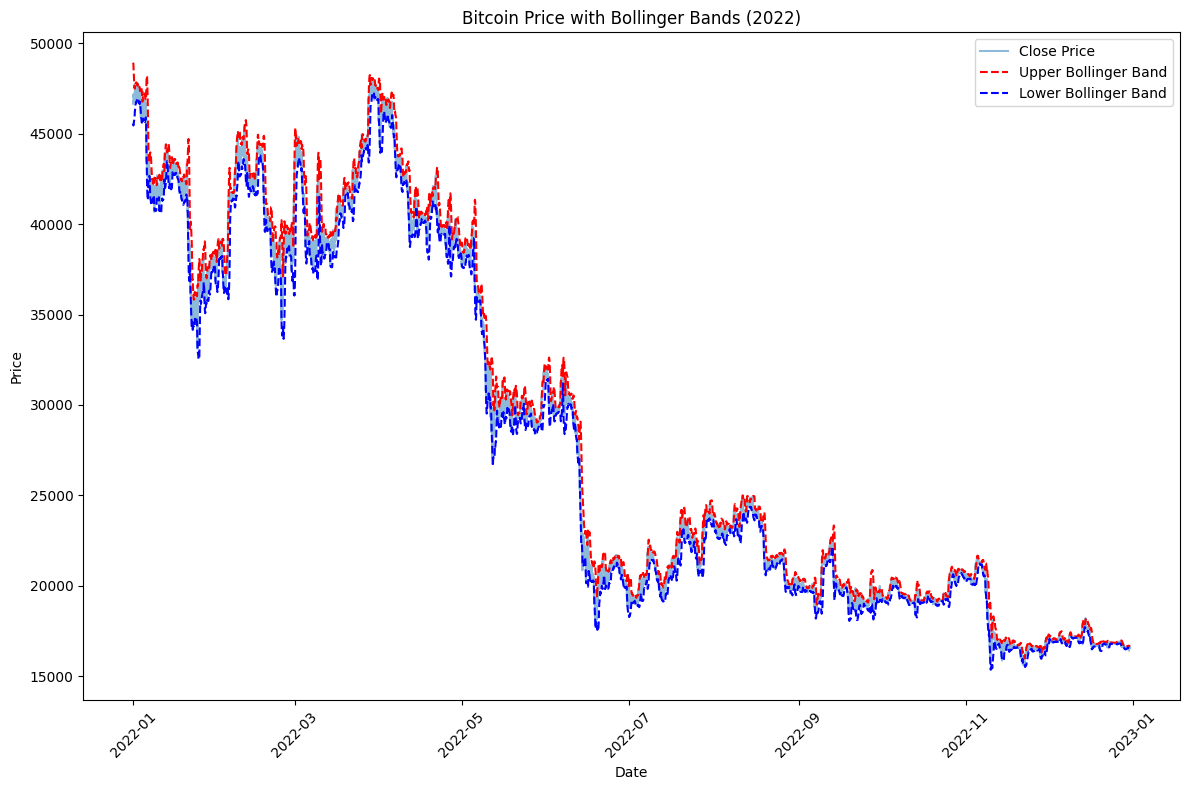

In [24]:
# Plot Close price and Bollinger Bands for 2022
plt.figure(figsize=(12, 8))

plt.plot(df_filtered_2022['Timestamp'], df_filtered_2022['Close'], label='Close Price', alpha=0.5)
# plt.plot(df_filtered_2022['Timestamp'], df_filtered_2022['SMA_20'], label='20-period SMA (Middle Band)', color='purple')
plt.plot(df_filtered_2022['Timestamp'], df_filtered_2022['Upper_BB'], label='Upper Bollinger Band', linestyle='--', color='red')
plt.plot(df_filtered_2022['Timestamp'], df_filtered_2022['Lower_BB'], label='Lower Bollinger Band', linestyle='--', color='blue')

plt.title('Bitcoin Price with Bollinger Bands (2022)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipykernel_4759/2387060709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_2022['EMA_12'] = df_filtered_2022['Close'].ewm(span=12, adjust=False).mean()
/tmp/ipykernel_4759/2387060709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_2022['EMA_26'] = df_filtered_2022['Close'].ewm(span=26, adjust=False).mean()
/tmp/ipykernel_4759/2387060709.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

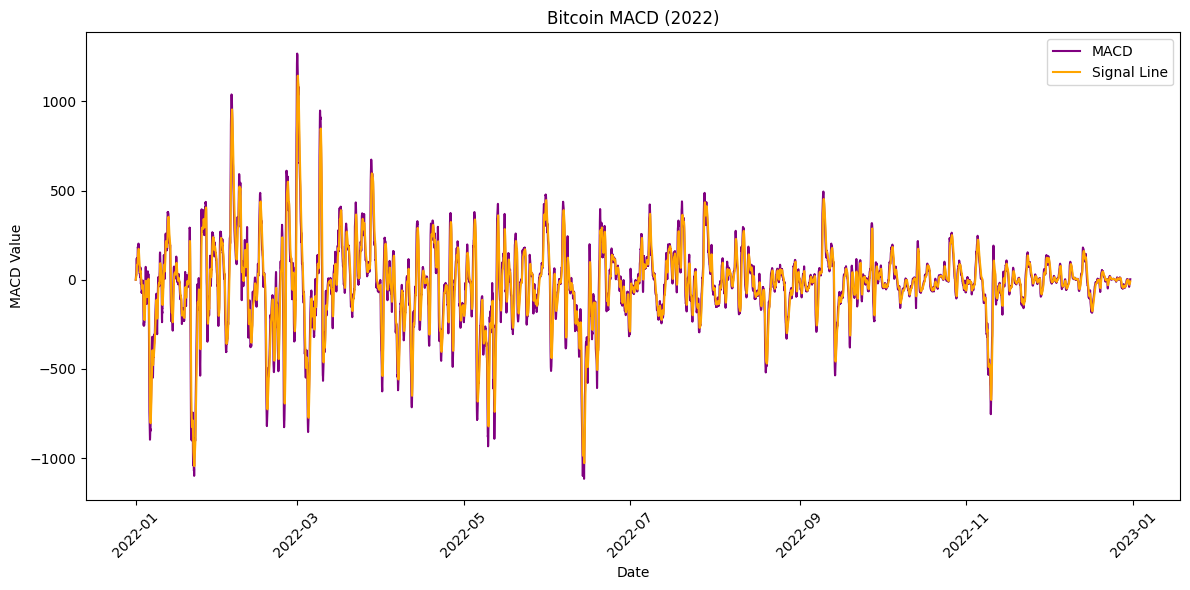

In [25]:
# MACD calculation (12, 26, 9 are typical parameters)
df_filtered_2022['EMA_12'] = df_filtered_2022['Close'].ewm(span=12, adjust=False).mean()
df_filtered_2022['EMA_26'] = df_filtered_2022['Close'].ewm(span=26, adjust=False).mean()
df_filtered_2022['MACD'] = df_filtered_2022['EMA_12'] - df_filtered_2022['EMA_26']
df_filtered_2022['Signal_Line'] = df_filtered_2022['MACD'].ewm(span=9, adjust=False).mean()

# Plot MACD for 2022
plt.figure(figsize=(12, 6))

plt.plot(df_filtered_2022['Timestamp'], df_filtered_2022['MACD'], label='MACD', color='purple')
plt.plot(df_filtered_2022['Timestamp'], df_filtered_2022['Signal_Line'], label='Signal Line', color='orange')

plt.title('Bitcoin MACD (2022)')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


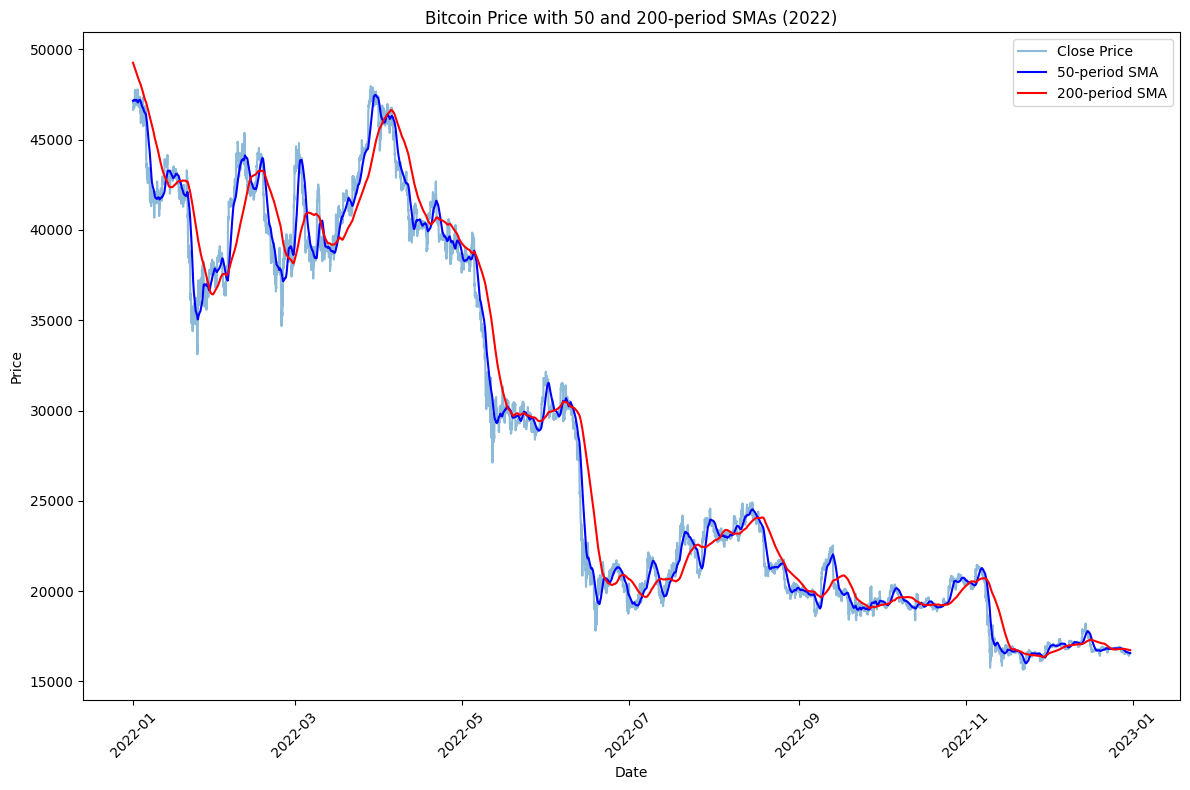

In [26]:
# Plot Close price with 50-period and 200-period SMAs for 2022
plt.figure(figsize=(12, 8))

plt.plot(df_filtered_2022['Timestamp'], df_filtered_2022['Close'], label='Close Price', alpha=0.5)
plt.plot(df_filtered_2022['Timestamp'], df_filtered_2022['SMA_50'], label='50-period SMA', color='blue')
plt.plot(df_filtered_2022['Timestamp'], df_filtered_2022['SMA_200'], label='200-period SMA', color='red')

plt.title('Bitcoin Price with 50 and 200-period SMAs (2022)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Add change features
We add change features to see how the market behaves.

### Add changes between 2 days

In [27]:
df['Change'] = df['Close'] - df['Close'].shift(1)
df.head()

,Timestamp,Open,High,Low,Close,Volume,Year,Month,SMA_20,SMA_50,SMA_200,EMA_20,EMA_50,EMA_200,RSI,Upper_BB,Lower_BB,Change
0,2019-01-01 00:00:00,3701.23,3713.00,3689.88,3700.31,686.367420,2019,1,NaN,NaN,NaN,3700.310000,3700.310000,3700.310000,NaN,NaN,NaN,NaN
1,2019-01-01 01:00:00,3700.20,3702.73,3684.22,3689.69,613.539115,2019,1,NaN,NaN,NaN,3699.298571,3699.893529,3700.204328,NaN,NaN,NaN,-10.62
2,2019-01-01 02:00:00,3689.67,3695.95,3675.04,3690.00,895.302181,2019,1,NaN,NaN,NaN,3698.412993,3699.505548,3700.102793,NaN,NaN,NaN,0.31
3,2019-01-01 03:00:00,3690.00,3699.77,3685.78,3693.13,796.714818,2019,1,NaN,NaN,NaN,3697.909851,3699.255526,3700.033412,NaN,NaN,NaN,3.13
4,2019-01-01 04:00:00,3692.32,3720.00,3685.94,3692.71,1317.452909,2019,1,NaN,NaN,NaN,3697.414627,3698.998839,3699.960542,NaN,NaN,NaN,-0.42


/tmp/ipykernel_4759/2387018251.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


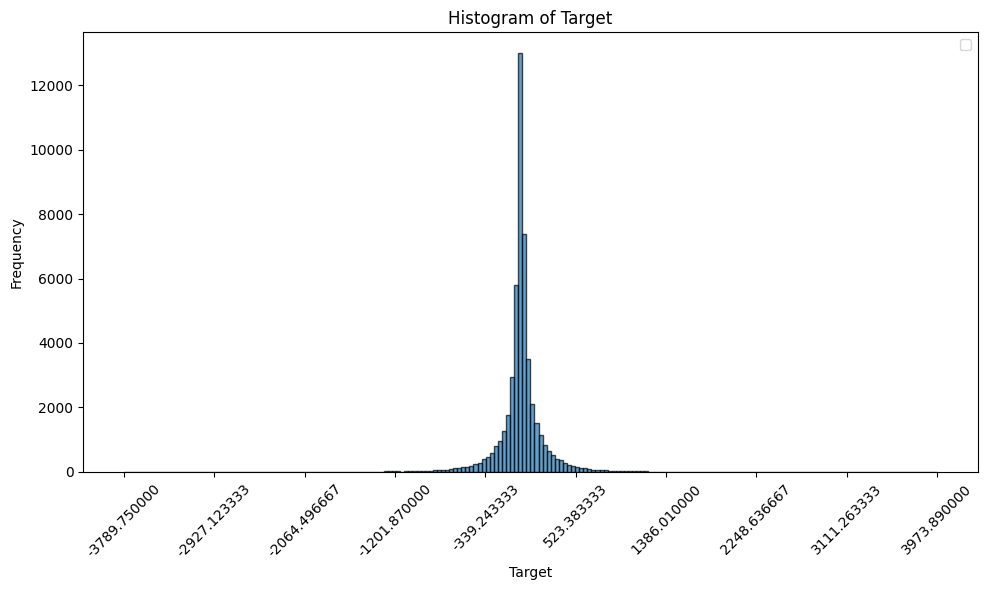

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# Remove any NaN values in the 'Target' column for clean plotting
df_cleaned = df['Change'].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned, bins=200, edgecolor='black', alpha=0.7)

# Customize the x-ticks
plt.xticks(np.linspace(df_cleaned.min(), df_cleaned.max(), num=10))  # Increase the number of ticks to 15 (you can adjust)

# Function to round x-tick labels to a certain precision (e.g., 6 decimal places)
def round_ticks(x, pos):
    return f'{x:0f}'  # Adjust the number of decimals here

# Set x-ticks and use FuncFormatter to apply custom rounding
plt.gca().xaxis.set_major_formatter(FuncFormatter(round_ticks))

# Add labels and title
plt.title('Histogram of Target')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

### Add log features
Now, we will use logarit algorithm to add more features to the dataset.

In [29]:
df['Target'] = np.log10(df['Close']).shift(-5) / df['Close'].shift(-1)
df.head()

,Timestamp,Open,High,Low,Close,Volume,Year,Month,SMA_20,SMA_50,SMA_200,EMA_20,EMA_50,EMA_200,RSI,Upper_BB,Lower_BB,Change,Target
0,2019-01-01 00:00:00,3701.23,3713.00,3689.88,3700.31,686.367420,2019,1,NaN,NaN,NaN,3700.310000,3700.310000,3700.310000,NaN,NaN,NaN,NaN,0.000967
1,2019-01-01 01:00:00,3700.20,3702.73,3684.22,3689.69,613.539115,2019,1,NaN,NaN,NaN,3699.298571,3699.893529,3700.204328,NaN,NaN,NaN,-10.62,0.000967
2,2019-01-01 02:00:00,3689.67,3695.95,3675.04,3690.00,895.302181,2019,1,NaN,NaN,NaN,3698.412993,3699.505548,3700.102793,NaN,NaN,NaN,0.31,0.000967
3,2019-01-01 03:00:00,3690.00,3699.77,3685.78,3693.13,796.714818,2019,1,NaN,NaN,NaN,3697.909851,3699.255526,3700.033412,NaN,NaN,NaN,3.13,0.000967
4,2019-01-01 04:00:00,3692.32,3720.00,3685.94,3692.71,1317.452909,2019,1,NaN,NaN,NaN,3697.414627,3698.998839,3699.960542,NaN,NaN,NaN,-0.42,0.000964


### Histogram to show distribution of Target

/tmp/ipykernel_4759/2664314078.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


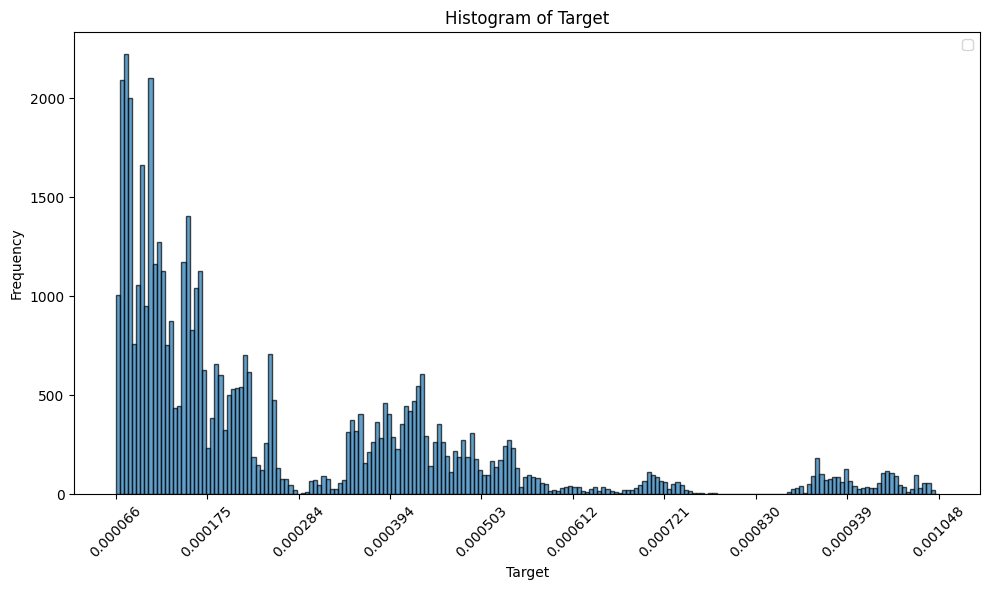

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# Remove any NaN values in the 'Target' column for clean plotting
df_cleaned = df['Target'].dropna()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned, bins=200, edgecolor='black', alpha=0.7)

# Customize the x-ticks
plt.xticks(np.linspace(df_cleaned.min(), df_cleaned.max(), num=10))  # Increase the number of ticks to 15 (you can adjust)

# Function to round x-tick labels to a certain precision (e.g., 6 decimal places)
def round_ticks(x, pos):
    return f'{x:.6f}'  # Adjust the number of decimals here

# Set x-ticks and use FuncFormatter to apply custom rounding
plt.gca().xaxis.set_major_formatter(FuncFormatter(round_ticks))

# Add labels and title
plt.title('Histogram of Target')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


### Normality Tests
Check if your Target data follows a normal distribution. This is useful for making decisions about which statistical tests or models to apply.

### Shapiro-Wilk Test

In [31]:
from scipy.stats import shapiro

stat, p = shapiro(df['Change'].dropna())
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print("Data looks normally distributed")
else:
    print("Data does not look normally distributed")

Shapiro-Wilk Test: Statistics=0.764, p=0.000
Data does not look normally distributed


/home/yosakoi/miniconda3/envs/tradingbot/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 50162.
  res = hypotest_fun_out(*samples, **kwds)


### Visual Normality Check: 
Use a Q-Q plot to visualize if the data aligns with a normal distribution.

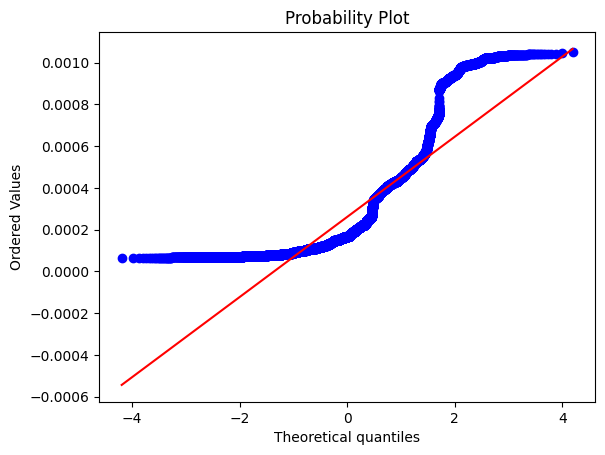

In [32]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df['Target'].dropna(), dist="norm", plot=plt)
plt.show()


### Skewness and Kurtosis:
These metrics help measure the asymmetry and peakedness of your data's distribution.

Skewness: Measures the asymmetry of the data distribution.

Kurtosis: Measures how heavy the tails of the distribution are.

1. A skewness near 0 indicates a symmetric distribution.
2. A positive kurtosis indicates heavy tails, while negative kurtosis suggests lighter tails.

In [33]:
skewness = df['Target'].skew()
kurtosis = df['Target'].kurtosis()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Skewness: 1.6545287009090373
Kurtosis: 2.5206752789962654


### Correlation Analysis

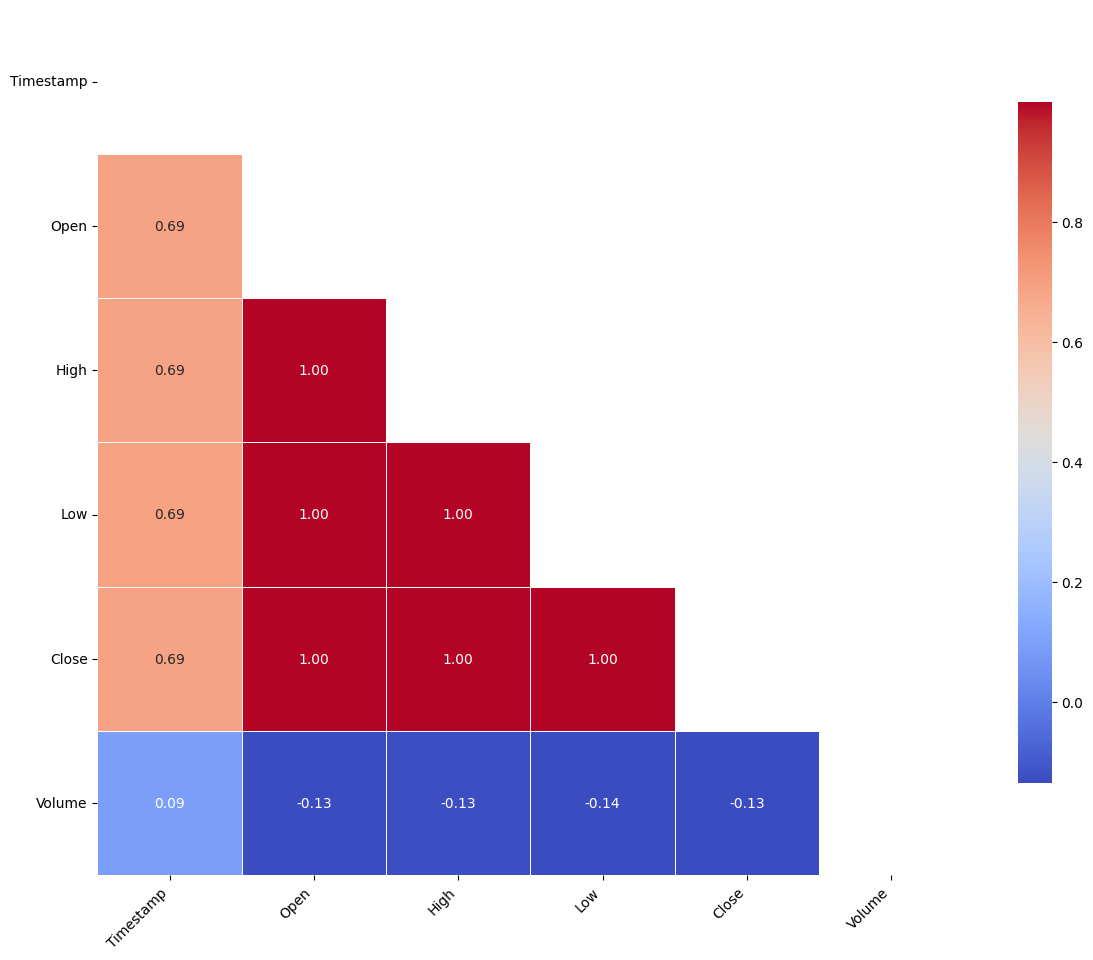

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'correlation_matrix' is your correlation matrix
plt.figure(figsize=(12, 10))  # Increase the figure size for better readability

# Create a mask for the upper triangle (optional, for a cleaner look)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Draw the heatmap with adjusted formatting
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar_kws={'shrink': 0.75}, linewidths=0.5, square=True)

# Rotate x and y axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate x labels for clarity
plt.yticks(rotation=0)               # Keep y labels horizontal

plt.tight_layout()  # Ensure labels don't overlap
plt.show()


### Autocorrelation:
If you're working with time series data, it’s important to check for autocorrelation to see if past values of Target are correlated with future values.

Autocorrelation can give you insights into potential lag relationships in time series data.

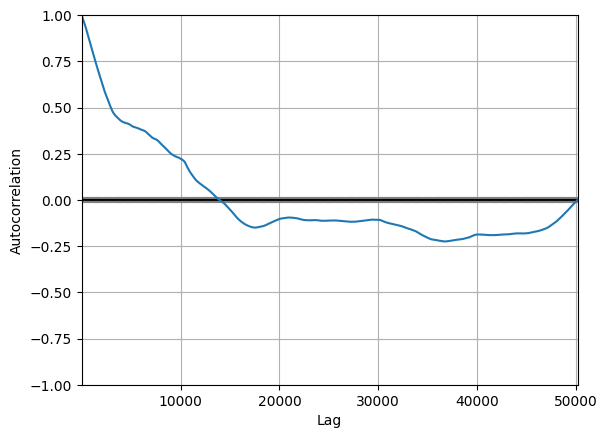

In [35]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Target'].dropna())
plt.show()


## Hypothesis Testing:
Based on your goals, you may want to test certain hypotheses. Here are some common tests:

1. t-tests: To compare means between groups.
2. ANOVA: To compare means across multiple groups.
3. Chi-square test: To test relationships between categorical variables.


### T-test
The t-test compares the means between two groups to check if they are statistically different.

In [36]:
from scipy.stats import ttest_ind

# Assuming 'df' has a 'Year' column
group1 = df[df['Year'] == 2020]['Target'].dropna()
group2 = df[df['Year'] == 2021]['Target'].dropna()

# Perform t-test
t_stat, p_value = ttest_ind(group1, group2)

print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means are not significantly different.")


t-statistic: 255.589, p-value: 0.000
Reject the null hypothesis: The means are significantly different.


### ANOVA (Analysis of Variance)
ANOVA is used to compare the means across more than two groups.

In [37]:
from scipy.stats import f_oneway

# Assuming 'df' has a 'Year' column
group1 = df[df['Year'] == 2019]['Target'].dropna()
group2 = df[df['Year'] == 2020]['Target'].dropna()
group3 = df[df['Year'] == 2021]['Target'].dropna()

# Perform ANOVA
f_stat, p_value = f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: At least one group mean is different.")
else:
    print("Fail to reject the null hypothesis: The group means are not significantly different.")

F-statistic: 26142.042, p-value: 0.000
Reject the null hypothesis: At least one group mean is different.


### Chi-Square Test
The Chi-square test is used to test the association between two categorical variables.

In [38]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example: Creating a binned version of 'Target' and testing its relationship with 'Month'
df['Target_binned'] = pd.qcut(df['Target'], q=4, labels=False)  # Binning Target into 4 categories

# Create a contingency table (cross-tab)
contingency_table = pd.crosstab(df['Month'], df['Target_binned'])

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat:.3f}, p-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the variables.")

Chi-square statistic: 10259.647, p-value: 0.000
Reject the null hypothesis: There is a significant association between the variables.


### Stationarity Test (for time series):
Check whether the data is stationary using the Augmented Dickey-Fuller (ADF) Test.

Stationarity is important for time series models like ARIMA.

In [39]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Target'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] > 0.05:
    print("Data is non-stationary")
else:
    print("Data is stationary")


ADF Statistic: -3.217774
p-value: 0.018979
Data is stationary


## Outlier Detection:
Identify outliers using statistical techniques like the Z-score or the IQR method.

### Z-score

In [40]:
from scipy import stats

# Remove NaN values and reset the index to align with z-scores
df_cleaned = df['Target'].dropna().reset_index()

# Calculate z-scores
z_scores = np.abs(stats.zscore(df_cleaned['Target']))

# Identify outliers where z-score > 3
outliers = df_cleaned[z_scores > 3]

# Sort outliers by value
outliers_sorted = outliers.sort_values(by='Target', ascending=False)

# Display the index, Target value, and z-score for each outlier
outlier_data = pd.DataFrame({
    'Index': outliers_sorted['index'],  # Original index from df
    'Target': outliers_sorted['Target'],
    'Z-Score': z_scores[z_scores > 3]
})

# Print the result
print(outlier_data)

      Index    Target   Z-Score
0         0  0.000967  3.275955
1         1  0.000967  3.276112
2         2  0.000967  3.273820
3         3  0.000967  3.274751
4         4  0.000964  3.263523
...     ...       ...       ...
2029   2029  0.000916  3.037658
2030   2030  0.000917  3.043101
2031   2031  0.000915  3.034837
2032   2032  0.000912  3.020452
2033   2033  0.000909  3.005506

[1698 rows x 3 columns]


### IQR method

In [41]:
import pandas as pd

# Remove NaN values
df_cleaned = df['Target'].dropna().reset_index()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_cleaned['Target'].quantile(0.25)
Q3 = df_cleaned['Target'].quantile(0.75)

# Interquartile Range (IQR)
IQR = Q3 - Q1

# Define outliers using IQR method
outlier_condition = (df_cleaned['Target'] < (Q1 - 1.5 * IQR)) | (df_cleaned['Target'] > (Q3 + 1.5 * IQR))

# Identify outliers
outliers = df_cleaned[outlier_condition]

# Sort outliers by 'Target' value for better readability
outliers_sorted = outliers.sort_values(by='Target', ascending=False)

# Create a DataFrame to display the index and outlier values
outlier_data = pd.DataFrame({
    'Index': outliers_sorted['index'],  # Original index from the full dataset
    'Target': outliers_sorted['Target']
})

# Print the outliers
print(outlier_data)


       Index    Target
678      678  0.001048
682      682  0.001044
679      679  0.001044
676      676  0.001043
677      677  0.001042
...      ...       ...
1306    1306  0.000863
1305    1305  0.000863
10534  10534  0.000830
2181    2181  0.000815
10535  10535  0.000813

[2185 rows x 2 columns]


### Principal Component Analysis (PCA):
PCA is conducted to reduce the dimensionality of your dataset while keeping the most important features. It helps identify patterns in high-dimensional data.

Steps:
1. Standardize your dataset to have zero mean and unit variance.
2. Apply PCA to extract the principal components.

This will help you visualize the data in two dimensions and understand which features contribute the most variance.

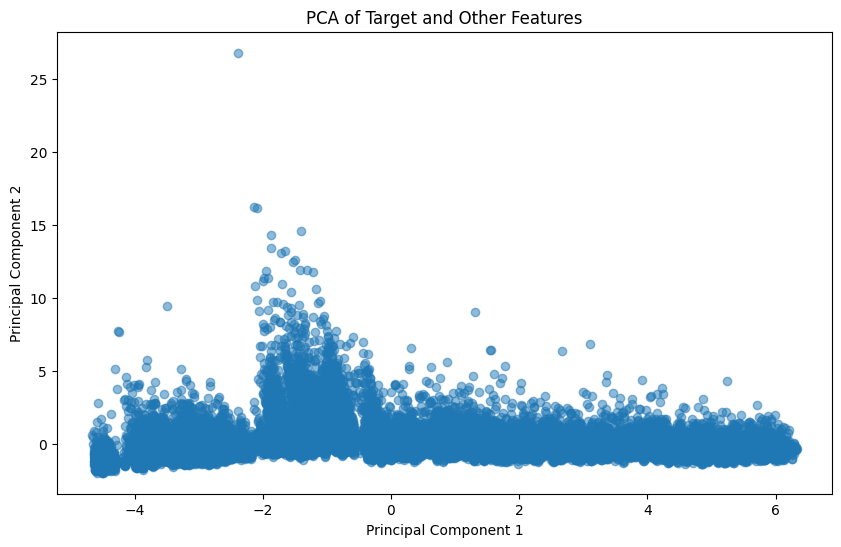

Explained variance by component: [0.78591032 0.09368435]


In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data (excluding non-numeric columns)
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_50', 'SMA_200', 'RSI', 'EMA_50', 'EMA_200', 'Target']
x = df[features].dropna()
x_scaled = StandardScaler().fit_transform(x)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)

# Visualize the principal components
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Target and Other Features')
plt.show()

# Explained variance
print(f'Explained variance by component: {pca.explained_variance_ratio_}')

### Time Series Decomposition (for Target):
Performing a decomposition of the time series can help break data into its trend, seasonality, and residual components.

Steps:
1. Decompose the time series using seasonal decomposition to separate the trend, seasonality, and noise.

This will show you how the Target is influenced by seasonality (repeating patterns), trend (long-term progression), and residual noise.

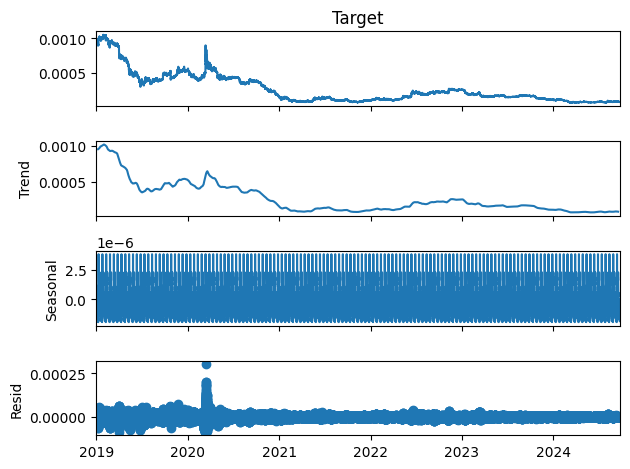

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set 'Timestamp' as index if you haven't already
df.set_index('Timestamp', inplace=True)

# Decompose the time series for 'Target'
decomposition = seasonal_decompose(df['Target'].dropna(), model='additive', period=365)

# Plot the decomposed components
decomposition.plot()
plt.show()

### Cross-Correlation Analysis

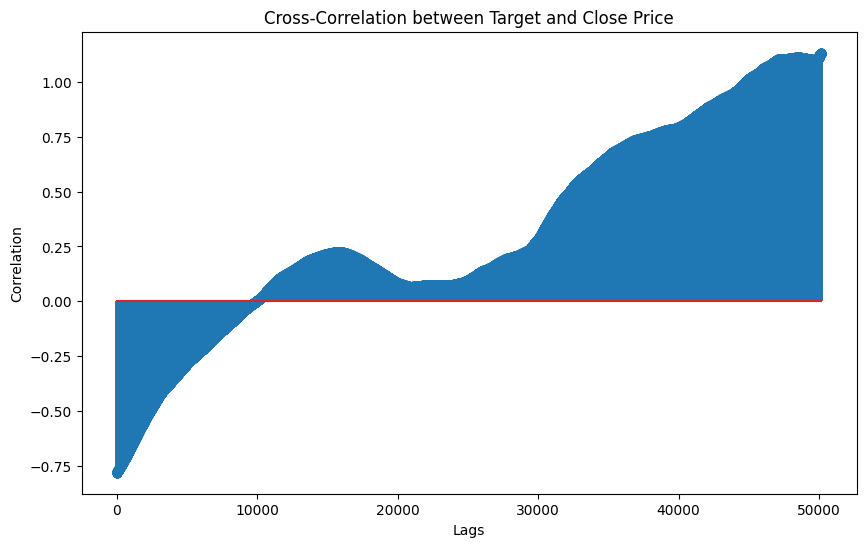

In [44]:
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt

# Drop rows where either 'Target' or 'Close' is NaN
df_cleaned = df[['Target', 'Close']].dropna()

# Calculate cross-correlation between 'Target' and 'Close' prices
cross_corr = ccf(df_cleaned['Target'], df_cleaned['Close'])

# Plot the cross-correlation function
plt.figure(figsize=(10, 6))
plt.stem(cross_corr)
plt.title('Cross-Correlation between Target and Close Price')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.show()

### Lag Analysis
Investigating lagged relationships in time series data can help you understand how past values of Target affect future values.

In [45]:
# Create lagged values for Target
df['Target_Lag1'] = df['Target'].shift(1)
df['Target_Lag5'] = df['Target'].shift(5)
df['Target_Lag10'] = df['Target'].shift(10)

# Check correlation of lagged values
correlation_lags = df[['Target', 'Target_Lag1', 'Target_Lag5', 'Target_Lag10']].corr()
print(correlation_lags)

                Target  Target_Lag1  Target_Lag5  Target_Lag10
Target        1.000000     0.999930     0.999694      0.999472
Target_Lag1   0.999930     1.000000     0.999743      0.999511
Target_Lag5   0.999694     0.999743     1.000000      0.999694
Target_Lag10  0.999472     0.999511     0.999694      1.000000


### Volatility Clustering (GARCH Model):
If you notice volatility clustering in your time series (periods of high volatility followed by low volatility), you can model this using the GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model.



/home/yosakoi/miniconda3/envs/tradingbot/lib/python3.12/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.643e-08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1e+04 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/home/yosakoi/miniconda3/envs/tradingbot/lib/python3.12/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


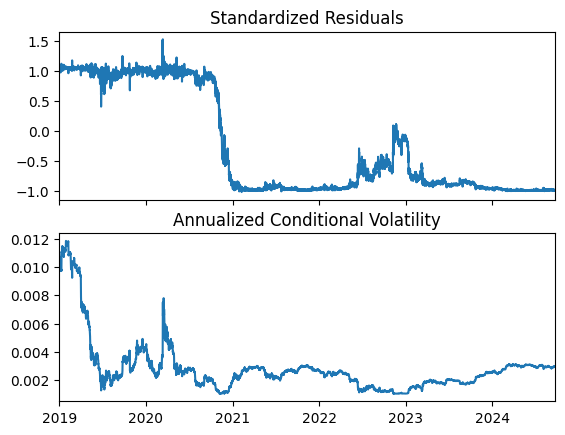

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Target   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                373460.
Distribution:                  Normal   AIC:                          -746912.
Method:            Maximum Likelihood   BIC:                          -746877.
                                        No. Observations:                50158
Date:                Tue, Sep 24 2024   Df Residuals:                    50157
Time:                        09:27:45   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.6119e-04  1.678e-09  1.556e+05      0.000 [2.

In [46]:
from arch import arch_model

# Fit a GARCH model on 'Target'
model = arch_model(df['Target'].dropna(), vol='Garch', p=1, q=1)
garch_fit = model.fit(disp='off')

# Plot the volatility
garch_fit.plot(annualize='D')
plt.show()

# Print the summary of the model
print(garch_fit.summary())

### Clustering Analysis (K-Means):
You can apply clustering (e.g., K-Means) to group similar time periods based on the behavior of Target and other variables (e.g., Close, Volume, etc.).

/tmp/ipykernel_4759/3699822798.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = x['Cluster'].values  # Assign the cluster labels back to the cleaned DataFrame


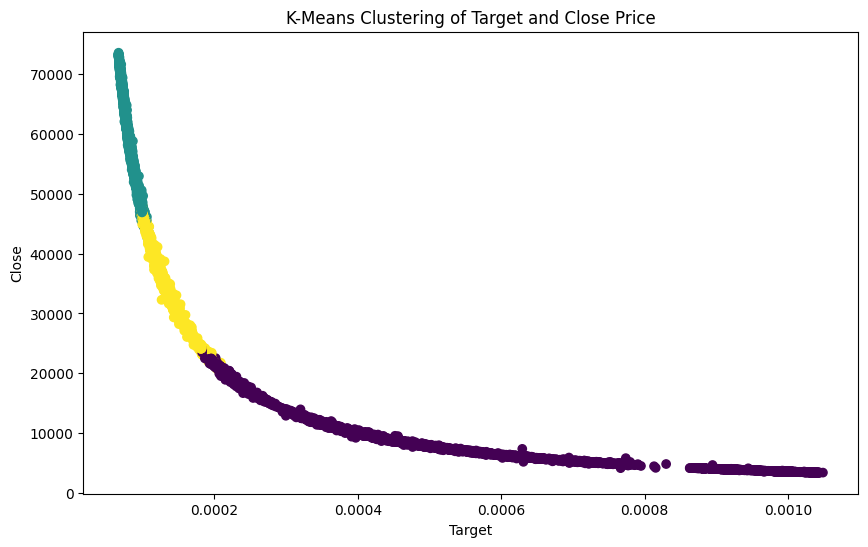

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use relevant features for clustering, drop NaNs from both 'df' and 'x'
x = df[['Target', 'Close', 'Volume', 'RSI', 'SMA_50', 'SMA_200']].dropna()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)
x['Cluster'] = kmeans.fit_predict(x)

# Now align the original DataFrame 'df' with the cleaned 'x'
df_cleaned = df.dropna(subset=['Target', 'Close', 'Volume', 'RSI', 'SMA_50', 'SMA_200'])
df_cleaned['Cluster'] = x['Cluster'].values  # Assign the cluster labels back to the cleaned DataFrame

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Target'], df_cleaned['Close'], c=df_cleaned['Cluster'], cmap='viridis')
plt.xlabel('Target')
plt.ylabel('Close')
plt.title('K-Means Clustering of Target and Close Price')
plt.show()

### Granger Causality Test:
If you want to check if one time series can predict another, you can use the Granger Causality Test.

In [48]:
from statsmodels.tsa.stattools import grangercausalitytests

# Check if Close prices can predict Target values
grangercausalitytests(df[['Close', 'Target']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.7766  , p=0.0092  , df_denom=50154, df_num=1
ssr based chi2 test:   chi2=6.7770  , p=0.0092  , df=1
likelihood ratio test: chi2=6.7766  , p=0.0092  , df=1
parameter F test:         F=6.7766  , p=0.0092  , df_denom=50154, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3755.0194, p=0.0000  , df_denom=50151, df_num=2
ssr based chi2 test:   chi2=7510.7876, p=0.0000  , df=2
likelihood ratio test: chi2=6998.9315, p=0.0000  , df=2
parameter F test:         F=3755.0194, p=0.0000  , df_denom=50151, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2506.2906, p=0.0000  , df_denom=50148, df_num=3
ssr based chi2 test:   chi2=7519.9214, p=0.0000  , df=3
likelihood ratio test: chi2=7006.8657, p=0.0000  , df=3
parameter F test:         F=2506.2906, p=0.0000  , df_denom=50148, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=

{1: ({'ssr_ftest': (6.776638719249869, 0.009238584204869792, 50154.0, 1),
   'ssr_chi2test': (6.7770440690955, 0.00923376817030148, 1),
   'lrtest': (6.776586264837533, 0.009236136871929099, 1),
   'params_ftest': (6.776638719246688, 0.009238584204919338, 50154.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3755.019429098783, 0.0, 50151.0, 2),
   'ssr_chi2test': (7510.787600880483, 0.0, 2),
   'lrtest': (6998.931478935061, 0.0, 2),
   'params_ftest': (3755.01942909852, 0.0, 50151.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2506.2906216835004, 0.0, 50148.0, 3),
   'ssr_chi2test': (7519.921400486715, 0.0, 3),
   'lrtest': (7006.8657019449165, 0.0, 3),
   'params_ftest': (2506.2906216835395, 0.0, 50148.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])]),
 4: ({'ssr_ftest': (1879.964645489046, 0.0, 50145.0, 4),
   'ssr_chi2test': (7521.2082424854

## Using machine learning for data analysis
In this step, I will deploy some simple machine learning model to analyze data.

## Random forest model

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare data for modeling (drop NaNs from both X and y)
features = ['Close', 'Volume', 'RSI', 'SMA_50', 'SMA_200']
X = df[features].dropna()

# Align 'Target' with features, ensuring both X and y have the same indices
y = df['Target'].loc[X.index]

# Drop any remaining NaN values in 'y' (if any exist)
y = y.dropna()

# Update X to match the cleaned 'y'
X = X.loc[y.index]

# Check the sizes for debugging
print("This is X size:", X.shape)
print("This is y size:", y.shape)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)




This is X size: (49959, 5)
This is y size: (49959,)
Mean Squared Error: 8.0321184291069e-12


### Evaluate the model
Using AI metrics to evaluate the model

In [65]:
from sklearn.metrics import r2_score, mean_absolute_error

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

R-squared: 0.999822796230632
Mean Absolute Error: 1.1253615297130903e-06


## Get the feature importance
Random Forest models have an advantage in that they provide feature importance, allowing you to see which features contributed the most to predictions.

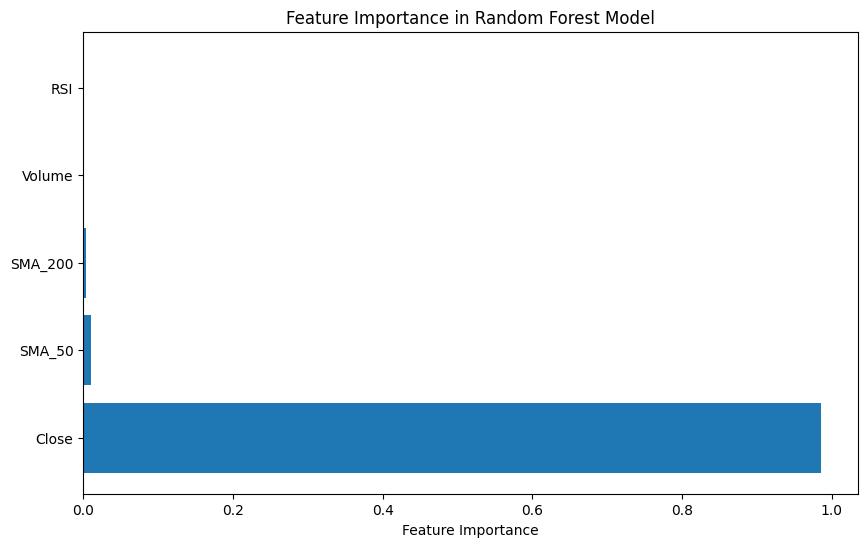

In [66]:
# Get feature importances from the Random Forest model
importances = model.feature_importances_
feature_names = X.columns

# Sort and visualize feature importance
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_indices], align='center')
plt.yticks(range(len(importances)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()


## Residual Analysis
Residuals (the difference between predicted and actual values) can tell you if your model is biased or if there are patterns it is not capturing well.

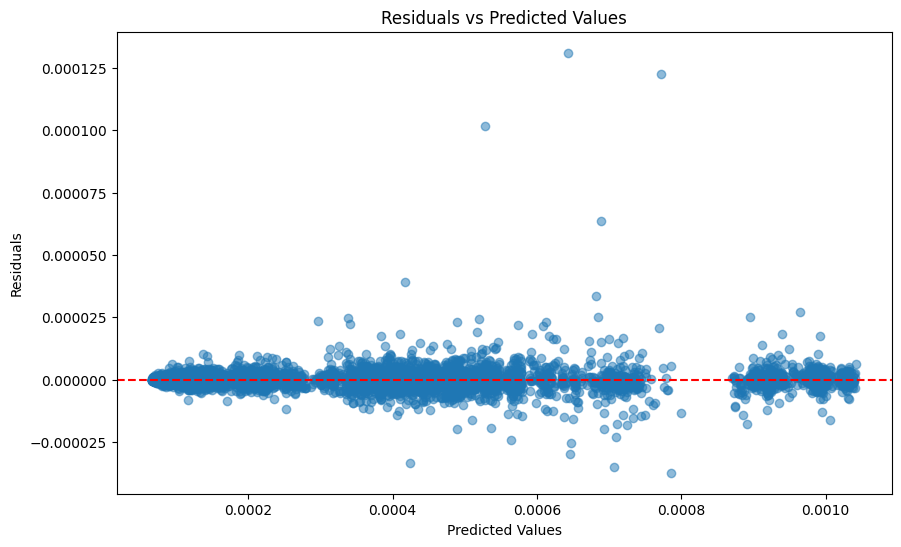

In [67]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

## Actual vs Predicted Plot
To visually compare how well the predictions align with the actual values, plot the actual vs predicted values.

If the model is perfect, the points will lie exactly on the red diagonal line. The more scattered they are, the less accurate the model is.

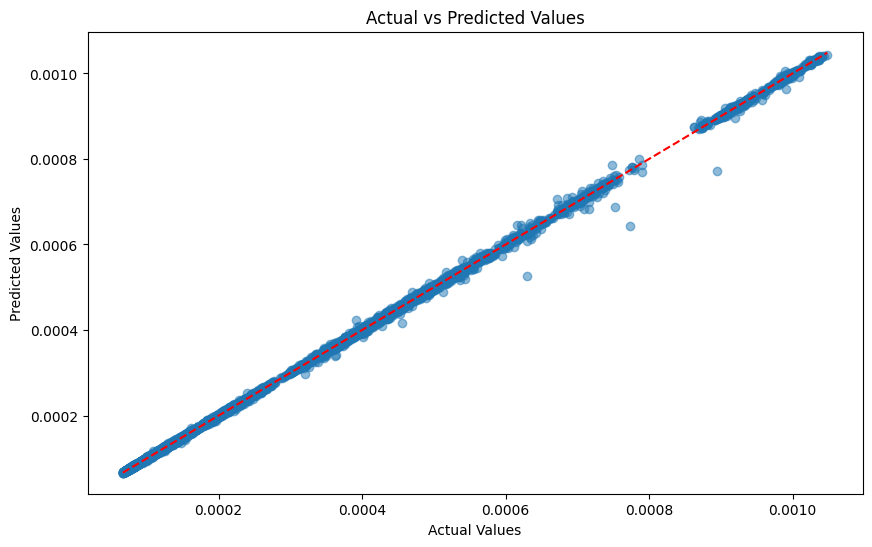

In [68]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## Error Distribution (Histogram)
Visualize the distribution of the errors (residuals) to check for normality or other patterns.

Normally distributed residuals are a good sign, while skewed or multi-modal distributions may indicate that the model struggles with certain patterns in the data.

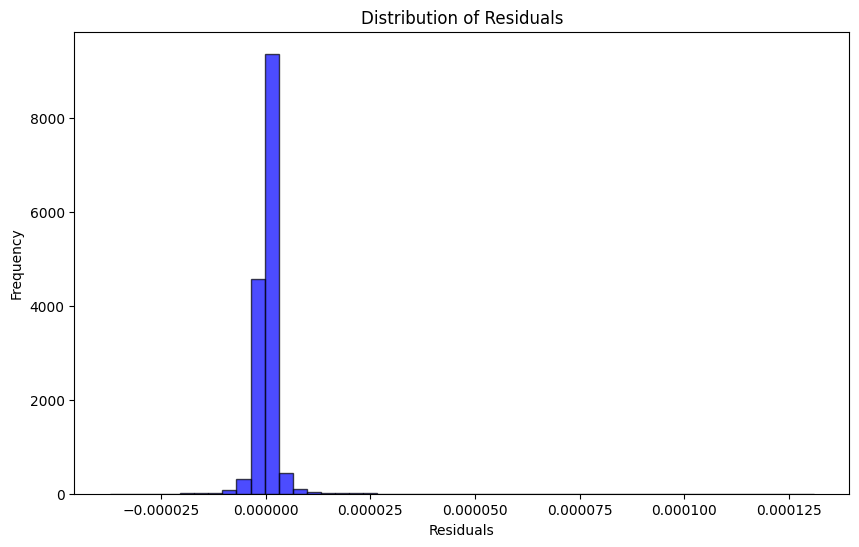

In [70]:
# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Cross-Validation
Applying cross-validation to see how it performs across different splits of the data.

In [71]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and get the average score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -np.mean(cv_scores)
print(f"Cross-Validated Mean Squared Error: {cv_mse}")

Cross-Validated Mean Squared Error: 1.1737997293119396e-09


## Partial Dependence Plot (PDP)
Partial dependence plots show the relationship between a feature and the predicted outcome, while keeping all other features constant. This is useful to understand how individual features affect the model.

This plot will show how the Close and Volume features (for example) impact the target prediction.

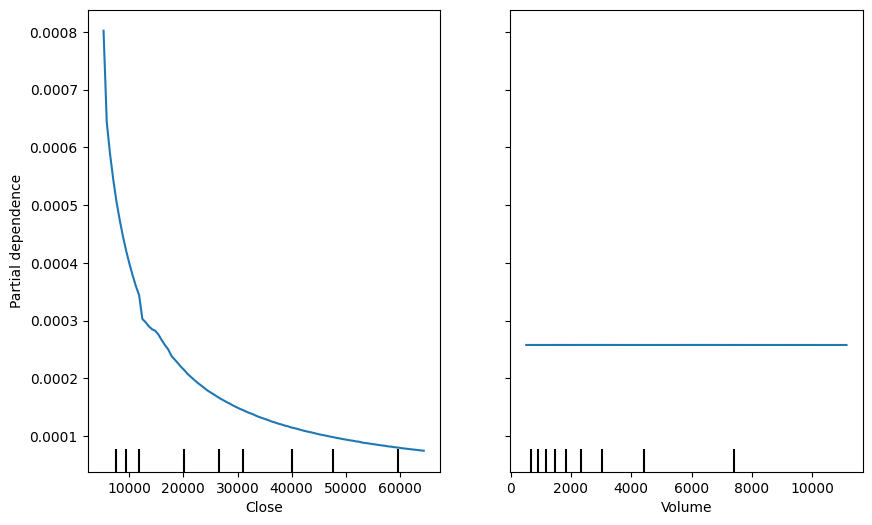

In [73]:
from sklearn.inspection import PartialDependenceDisplay

# Plot partial dependence for selected features
features_to_plot = ['Close', 'Volume']

# Display the partial dependence plots
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(model, X_train, features_to_plot, ax=ax)
plt.show()

## SHAP
SHAP is one of the best tools for understanding how each feature influences individual predictions in complex models like Random Forests.

In [75]:
import shap

# Create a SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot of SHAP values to see feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

/home/yosakoi/miniconda3/envs/tradingbot/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## SHAP Force Plot for Individual Predictions
This will show you how each feature contributes positively or negatively to a single prediction.

In [ ]:
# Select an instance from the test set for explanation (e.g., the first row)
instance_index = 0
shap.force_plot(explainer.expected_value, shap_values[instance_index], X_test.iloc[instance_index])

## SHAP Dependence Plot
To visualize how a single feature impacts the model's predictions across different values, you can use a dependence plot.

In [ ]:
# Plot dependence of a feature (e.g., 'Close') on the SHAP values
shap.dependence_plot("Close", shap_values, X_test)